In [143]:
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [144]:
X, y = sklearn.datasets.make_classification(n_samples=10000, n_classes =2,
                                            n_features=10, 
                                            n_informative=2, n_redundant=8,
                                            shuffle=True,
                                            random_state=40)
df = pd.DataFrame(data=X)
# Drop NA
df = df.dropna()

In [145]:
fa = FactorAnalyzer(n_factors = 7, rotation = "varimax")
fa.fit(df)

FactorAnalyzer(n_factors=7, rotation='varimax', rotation_kwargs={})

In [146]:
# Get loadings, EV, and ev
loadings = fa.loadings_
eV, ev = fa.get_eigenvalues()
print(ev)

[ 5.875e+00  4.123e+00 -8.558e-04 -8.785e-04 -9.262e-04 -9.450e-04
 -9.722e-04 -1.055e-03 -1.137e-03 -1.199e-03]


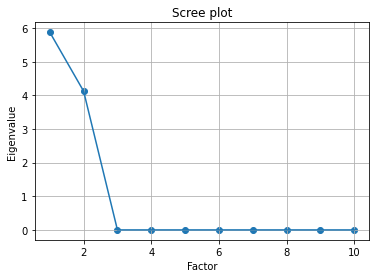

In [147]:
# scree plot 
# line plot of the eigenvalues of factors or principal components in an analysis.
xvals = range(1, df.shape[1]+1)
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.title('Scree plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [148]:
pd.DataFrame.from_records(loadings)

,0,1,2,3,4,5,6
0,0.998080,0.053974,0.0,0.0,0.0,0.0,0.0
1,0.196384,0.979917,0.0,0.0,0.0,0.0,0.0
2,0.503515,0.863287,0.0,0.0,0.0,0.0,0.0
3,0.713142,-0.700379,0.0,0.0,0.0,0.0,0.0
4,0.972903,0.229082,0.0,0.0,0.0,0.0,0.0
5,-0.989736,-0.139541,0.0,0.0,0.0,0.0,0.0
6,0.882718,-0.468995,0.0,0.0,0.0,0.0,0.0
7,0.377243,-0.925560,0.0,0.0,0.0,0.0,0.0
8,-0.156131,0.987176,0.0,0.0,0.0,0.0,0.0
9,0.959813,-0.279110,0.0,0.0,0.0,0.0,0.0


[6.418e-01 1.506e+04 7.968e+03 5.563e+03 1.817e+02 3.733e+01 2.156e+03
 1.377e+04 1.767e+04 8.050e+02]
[[ 0.516  0.05  -0.342  0.925]
 [-0.768 -0.21   0.344 -1.038]
 [-1.078 -0.449  0.297 -1.074]
 [-0.871 -0.1    0.557 -1.521]
 [ 0.73   0.173 -0.359  1.053]]


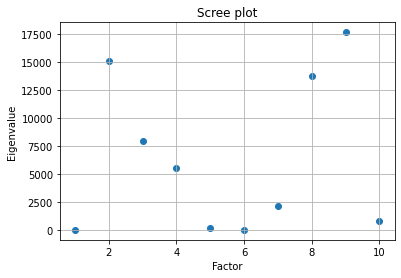

In [149]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

dataframe = df
array = dataframe.values

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)

# summarize scores
# set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])
# scree plot 
# line plot of the eigenvalues of factors or principal components in an analysis.
xvals = range(1, df.shape[1]+1)
plt.scatter(xvals,fit.scores_)
plt.title('Scree plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [150]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
#ranking = rfe.ranking_.reshape(X.shape)
ranking = rfe.ranking_
print(ranking)


[ 8  1  3  6  5  9  7  4  2 10]
